# Objective:To build a network to classify Reuters newswires into 46 mutually exclusive topics.

## 1.Loading the Reuters dataset

In [47]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [48]:
len(train_data)

8982

In [49]:
len(test_data)

2246

In [50]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 2.Decoding newswires back to test

In [51]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i,-3) for i in train_data[0]])

In [52]:
train_labels[10]

3

## 3.Preparing the data

In [53]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [54]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [55]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [56]:
one_hot_train_labels[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 4.Building networks

In [57]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

## 5.Compiling the model

In [58]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 6.Setting aside a validation set

In [59]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

## 7.Training the model

In [60]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 235us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 180us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


## 8. Plotting the training and validation loss

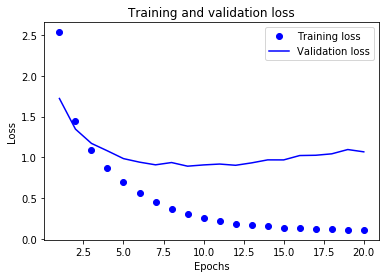

In [61]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(history_dict['acc'])+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 9.Plotting the training and validation accuracy

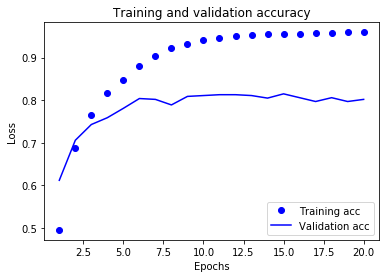

In [62]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 10.Retraining a model from scratch

In [63]:
#Building network
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
#compile the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
#training the model
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=9,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 232us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 176us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 180us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 188us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [64]:
Results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 168us/step


In [65]:
Results

[1.0224982932117086, 0.7756010686194165]

## 11.Generating prediction for new data

In [66]:
predictions=model.predict(x_test)

In [67]:
predictions[10]

array([1.4165016e-03, 8.4023297e-01, 1.0290715e-02, 1.3384119e-03,
       1.5720988e-03, 3.2653600e-02, 2.3094674e-04, 4.7770835e-04,
       4.2265921e-05, 8.6160953e-04, 2.1269746e-02, 9.1693806e-04,
       3.1225791e-04, 1.0663583e-02, 3.8124353e-03, 4.5187799e-03,
       1.4277687e-03, 7.1598741e-04, 8.2770461e-04, 1.6707310e-03,
       3.2332152e-04, 1.2689503e-03, 2.3701428e-03, 3.2260019e-04,
       2.7486904e-02, 5.3448958e-04, 2.2029055e-03, 8.3676243e-04,
       1.0736238e-02, 1.7771978e-04, 2.1807870e-04, 4.6831411e-03,
       5.1490340e-04, 1.3035357e-04, 2.0244061e-03, 5.0147675e-04,
       4.7672675e-03, 4.0138210e-04, 1.4326995e-03, 2.5062743e-04,
       7.1922585e-04, 3.4698055e-04, 4.3966272e-04, 1.8066778e-04,
       1.4679931e-03, 4.0838824e-04], dtype=float32)

In [68]:
predictions[0].shape

(46,)

In [69]:
np.sum(predictions[0])

0.9999999

In [70]:
np.argmax(predictions[0])

3